In [21]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../Analysis')

import numpy as np
import matplotlib.pyplot as plt
import random
from collections import deque
from MBN_Res_Constrn import MBN_RC
from ClusterTracking import SCTA

**Loading simulation runs from file**

In [2]:
basedir = '/home/jupyter-avinash/datastore/explosive_sync/'
data1 = np.load(basedir + 'Cluster-formation-analysis/mb_data_adaptive_a_0.01_b_0.002_tr_1.npz')
data2 = np.load(basedir + 'Cluster-formation-analysis/mb_data_adaptive_a_0.01_b_0.002_tr_2.npz')
data3 = np.load(basedir + 'Cluster-formation-analysis/mb_data_adaptive_a_0.01_b_0.002_tr_3.npz')
data4 = np.load(basedir + 'Cluster-formation-analysis/mb_data_adaptive_a_0.01_b_0.002_tr_4.npz')

global_order_1 = data1['arr1']
theta_1 = data1['arr3']

global_order_2 = data2['arr1']
theta_2 = data2['arr3']

global_order_3 = data3['arr1']
theta_3 = data3['arr3']

global_order_4 = data4['arr1']
theta_4 = data4['arr3']

print("done")

done


In [3]:
transitoin_time_points_1 = [15700, 31480, 67600, 87910, 
                          117800, 171970, 258150, 299080, 371190]
transitoin_time_points_2 = [14960, 42600, 145340, 156140, 
                          161520, 187930, 194360, 233750, 257930, 327630, 349450, 369440]
transitoin_time_points_3 = [12460, 44330, 82760, 111840, 132780, 152120, 167820, 182210, 
                          190920, 215810, 234820, 271650, 281430, 305700, 326030, 373050, 383400]
transitoin_time_points_4 = [41440, 83660, 112120, 150440, 158350, 228240, 273250, 313840, 
                          333820, 360100, 360100, 368630, 377160, 390990]

tr_end_idxes = [9, 21, 38, 52]
subarrays = []
window_size = 1000 

for t in transitoin_time_points_1:
    start_idx = t
    end_idx = start_idx + window_size
    subarrays.append(global_order_1[start_idx:end_idx])
    
for t in transitoin_time_points_2:
    start_idx = t
    end_idx = start_idx + window_size
    subarrays.append(global_order_2[start_idx:end_idx])
    
for t in transitoin_time_points_3:
    start_idx = t
    end_idx = start_idx + window_size
    subarrays.append(global_order_3[start_idx:end_idx])
    
for t in transitoin_time_points_4:
    start_idx = t
    end_idx = start_idx + window_size
    subarrays.append(global_order_4[start_idx:end_idx])

print("done")

done


In [47]:
mbn = MBN_RC()

/home/jupyter-avinash/ranjan_env_15_Feb_2023/Explosive Synchronization/Formatted code files/Mouse brain network/MouseBrainLib/mb_communities.npz already exists
DataUtils initialized


In [69]:
transient_index = 2

# Calculate local order for one transient
local_order = np.zeros([window_size, theta_3.shape[1]])
local_order_phase = np.zeros([window_size, theta_3.shape[1]])

for t in range(transitoin_time_points_3[transient_index], 
               transitoin_time_points_3[transient_index] + window_size):
    val, phase = mbn.GetLocalOrder(theta_3[t])
    local_order[t - transitoin_time_points_3[transient_index]] = val.T
    local_order_phase[t - transitoin_time_points_3[transient_index]] = phase.T

print("done")

done


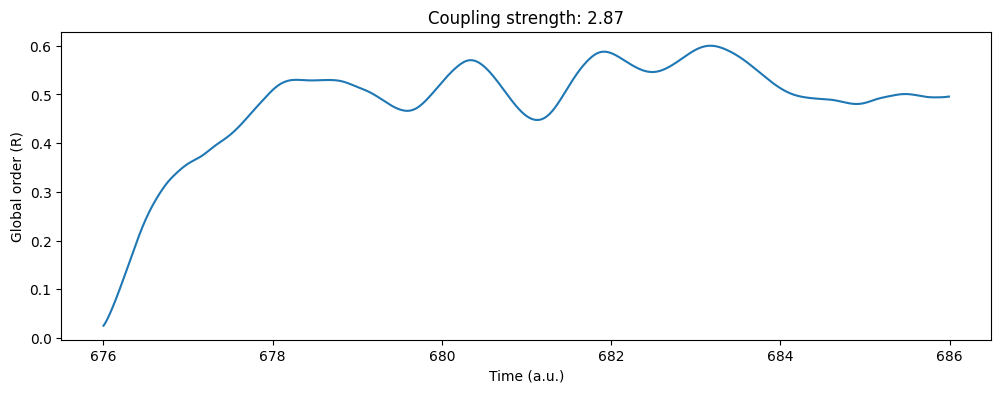

In [70]:
nepochs = len(theta_1)
start = transitoin_time_points_1[transient_index]
f = plt.figure(figsize=(12, 4))
plt.title("Coupling strength: 2.87") 

plt.plot(np.linspace(0, nepochs, nepochs)[start:start+1000]*mbn.dt, 
         global_order_1[start:start+1000])

plt.ylabel("Global order (R)")
plt.xlabel("Time (a.u.)")
plt.show()

### Run Cluster tracking for all transients

In [36]:
TIME_OF_ENTRY = np.zeros([len(subarrays), mbn.N]) # Keep track of time of entry of all 52 transients
NODE_COMMUNITIES = np.zeros([len(subarrays), window_size, mbn.N]) #MAX_CLUSTER_ID

for trnst_idx in range(len(subarrays)):
    
    print("Processing transient ", trnst_idx)
    local_order = np.zeros([window_size, mbn.N])
    local_order_phase = np.zeros([window_size, mbn.N])
        
    if trnst_idx < tr_end_idxes[0]:
        idx_ = trnst_idx
        for t in range(transitoin_time_points_1[idx_], transitoin_time_points_1[idx_] + window_size):
            val, phase = mbn.GetLocalOrder(theta_1[t])
            local_order[t - transitoin_time_points_1[idx_]] = val.T
            local_order_phase[t - transitoin_time_points_1[idx_]] = phase.T
            
    elif (trnst_idx >= tr_end_idxes[0]) and (trnst_idx < tr_end_idxes[1]):
        idx_ = trnst_idx - tr_end_idxes[0]
        for t in range(transitoin_time_points_2[idx_], transitoin_time_points_2[idx_] + window_size):
            val, phase = mbn.GetLocalOrder(theta_2[t])
            local_order[t - transitoin_time_points_2[idx_]] = val.T
            local_order_phase[t - transitoin_time_points_2[idx_]] = phase.T
    
    elif (trnst_idx >= tr_end_idxes[1]) and (trnst_idx < tr_end_idxes[2]):
        idx_ = trnst_idx - tr_end_idxes[1]
        for t in range(transitoin_time_points_3[idx_], transitoin_time_points_3[idx_] + window_size):
            val, phase = mbn.GetLocalOrder(theta_3[t])
            local_order[t - transitoin_time_points_3[idx_]] = val.T
            local_order_phase[t - transitoin_time_points_3[idx_]] = phase.T
            
    elif (trnst_idx >= tr_end_idxes[2]) and (trnst_idx < tr_end_idxes[3]):
        idx_ = trnst_idx - tr_end_idxes[2]
        for t in range(transitoin_time_points_4[idx_], transitoin_time_points_4[idx_] + window_size):
            val, phase = mbn.GetLocalOrder(theta_4[t])
            local_order[t - transitoin_time_points_4[idx_]] = val.T
            local_order_phase[t - transitoin_time_points_4[idx_]] = phase.T
    
    scta = SCTA(mbn.binary_conn, 
                local_order, 
                local_order_phase, 
                sync_thrsh=0.5)
    scta.track_clusters()
    scta.update_synchronization_cluster_stats()

    TIME_OF_ENTRY[trnst_idx], NODE_COMMUNITIES[trnst_idx] = EstimateTimeOfEntryInSyncCluster(local_order)

print("done")
# np.savez("algo_fragmentation_fixed/entry_time_stats-0.5.npz", arr1=TIME_OF_ENTRY, arr2=NODE_COMMUNITIES)

done


### Run Cluster Tracking Algorithm

In [75]:
scta = SCTA(mbn.binary_conn, 
            local_order, 
            local_order_phase, 
            sync_thrsh=0.5)
scta.track_clusters()
scta.update_synchronization_cluster_stats()

0
100
200
300
400
500
600
700
800
900
Cluster tracking complete!


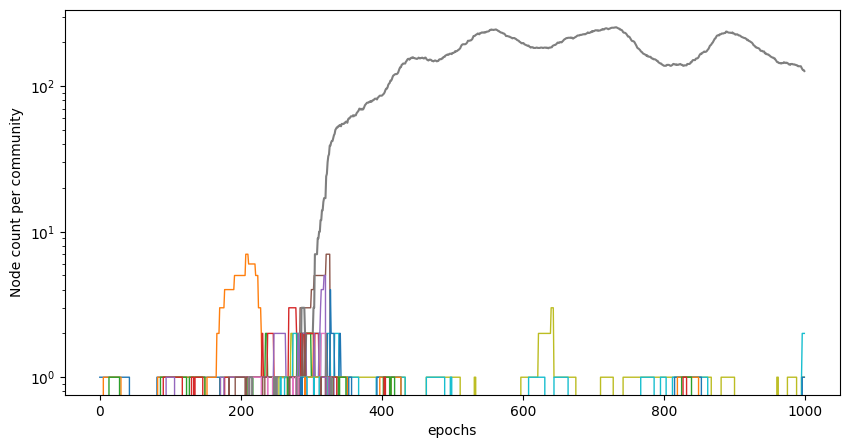

In [76]:
f = plt.figure(figsize=(10, 5))
for i in range(scta.MIN_CLUSTER_ID, scta.MAX_CLUSTER_ID):
    if np.max(scta.count_per_sync_cluster[:,i]) > 10:
        plt.plot(np.linspace(0, scta.window_size-1, scta.window_size), 
                 scta.count_per_sync_cluster[:,i], label=""+str(i))
    else:
        plt.plot(np.linspace(0, scta.window_size-1, scta.window_size), 
                 scta.count_per_sync_cluster[:,i], linewidth=1)

plt.xlabel("epochs")
plt.ylabel("Node count per community")
plt.yscale("log")
plt.show()